In [1]:
import os

os.chdir("/home/andre/SmartBinAnalysis/Deliverables")

In [2]:
import pandas as pd
import save_load as sl
import transform as t

pd.set_option("future.no_silent_downcasting", True)

PATH = "home/andre/SmartSensro2024"

ids = sl.load_id_containers(path=PATH)

container_dict = {id: sl.load_container_structured(id, path=PATH, ver="_Corrected_with_metrics") for id in ids}

/home/andre/SmartBinAnalysis/Deliverables/save_load.py:64: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_collection['Date'] = pd.to_datetime(df_collection['Date'])


In [3]:
trash_type = [c.info["description"].item() for id, c in container_dict.items()]

vals = list(set(trash_type))  # keep just unqieu values

print(vals)

c1_keys = list(filter(lambda key: container_dict[key].info["description"].item() == vals[0], container_dict.keys()))
c2_keys = list(filter(lambda key: container_dict[key].info["description"].item() == vals[1], container_dict.keys()))

container_dict0 = {key: container_dict[key] for key in c1_keys}
container_dict1 = {key: container_dict[key] for key in c2_keys}


c1_keys

['Embalagens de papel e cartão', 'Mistura de embalagens']


[1715,
 1856,
 1866,
 2171,
 2336,
 2503,
 2508,
 2684,
 2747,
 2750,
 2852,
 2853,
 2946,
 3133,
 3137,
 3151,
 3340,
 3419,
 5642,
 5814,
 6221,
 6224,
 6227,
 6230,
 6233,
 6236,
 6900,
 6902,
 6906,
 6909,
 6915,
 7247,
 7252,
 7253,
 7361,
 7945,
 7947,
 7948,
 9419,
 9579,
 9594,
 9660,
 9787,
 9963,
 10037,
 10073,
 10079,
 10081,
 10083,
 10091,
 10092,
 10095,
 10112,
 10114,
 10121,
 10132,
 10133,
 10138,
 10142,
 10143,
 10149,
 10152,
 10161,
 10163,
 10166,
 10172,
 10173,
 10180,
 10189,
 10192,
 10197,
 10198,
 10200,
 10204,
 10240,
 10548,
 12390,
 12459,
 12496,
 12655,
 12656,
 13243,
 13490,
 13929,
 13939,
 14114,
 14338,
 14339,
 14370,
 15956,
 16060,
 16332,
 16340,
 16663,
 16853,
 16857,
 17821,
 18177,
 18689,
 18700,
 18704,
 18731,
 18761,
 18823,
 20155,
 20160,
 20348,
 20619,
 20794,
 20862,
 21989,
 24584,
 25591,
 27935,
 27964,
 27965,
 27966,
 29098]

In [4]:
import extract as e

PATH = "/home/andre/SmartData/"
FILE = "Enchimentos_com_Recolhas[RioMaior].csv"

fill_df, rec_df = e.import_same_file(FILE, collect_id_header="idrecolha", sep=";", path=PATH, print_first_line=True)

fill, collect, info = e.pre_process_data(
    df_fill=fill_df,
    df_collection=rec_df,
    id_header_fill="idcontentor",
    date_header_fill="Data da leitura",
    date_format_fill="%Y-%m-%d %H:%M:%S.%f",
    fill_header_fill="Enchimento",
    id_header_collect="idcontentor",
    date_header_collect="Data da leitura",
    date_format_collect="%Y-%m-%d %H:%M:%S.%f",
)

container_drivers, ids_drivers = e.container_global_sorted_wrapper(fill, collect, info)

FILL DF LINE 1: 
idcontentor                                         34
Matricula do contentor                           E0163
Tipo de contentor                                TITAN
Volume do tipo de contentor                       2500
description                      Mistura de embalagens
Distrito                                      SANTARÉM
Concelho                                     RIO MAIOR
Freguesia                                    Rio Maior
Localidade                                         NaN
Latitude                                     39.322142
Longitude                                    -8.988239
Data da leitura                2020-02-18 16:41:14.000
Enchimento                                          75
idrecolha                                          NaN
Rota                                               NaN
Data de ínicio                                     NaN
Data de fim                                        NaN
Km totais                                       

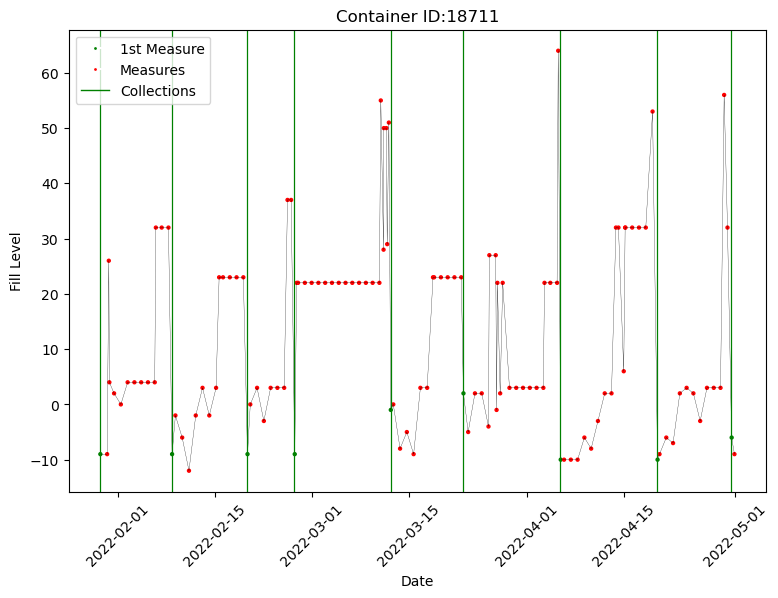

In [5]:
import random

from Container import TAG

tags = [container.get_tag(window=7, mv_thresh=70, min_days=30, use="spear") for _, container in container_dict.items()]

warn_ids = [x[0] for x in random.sample(list(filter(lambda x: x[1] == TAG.OK, zip(ids, tags))), 3)]

warn_ids = [18711]

start_date = "01-01-2022"
end_date = "01-05-2022"

for id in warn_ids:
    container_dict[id].plot_fill(start_date=start_date, end_date=end_date)
#     container_drivers[id].plot_fill(start_date = start_date, end_date = end_date)

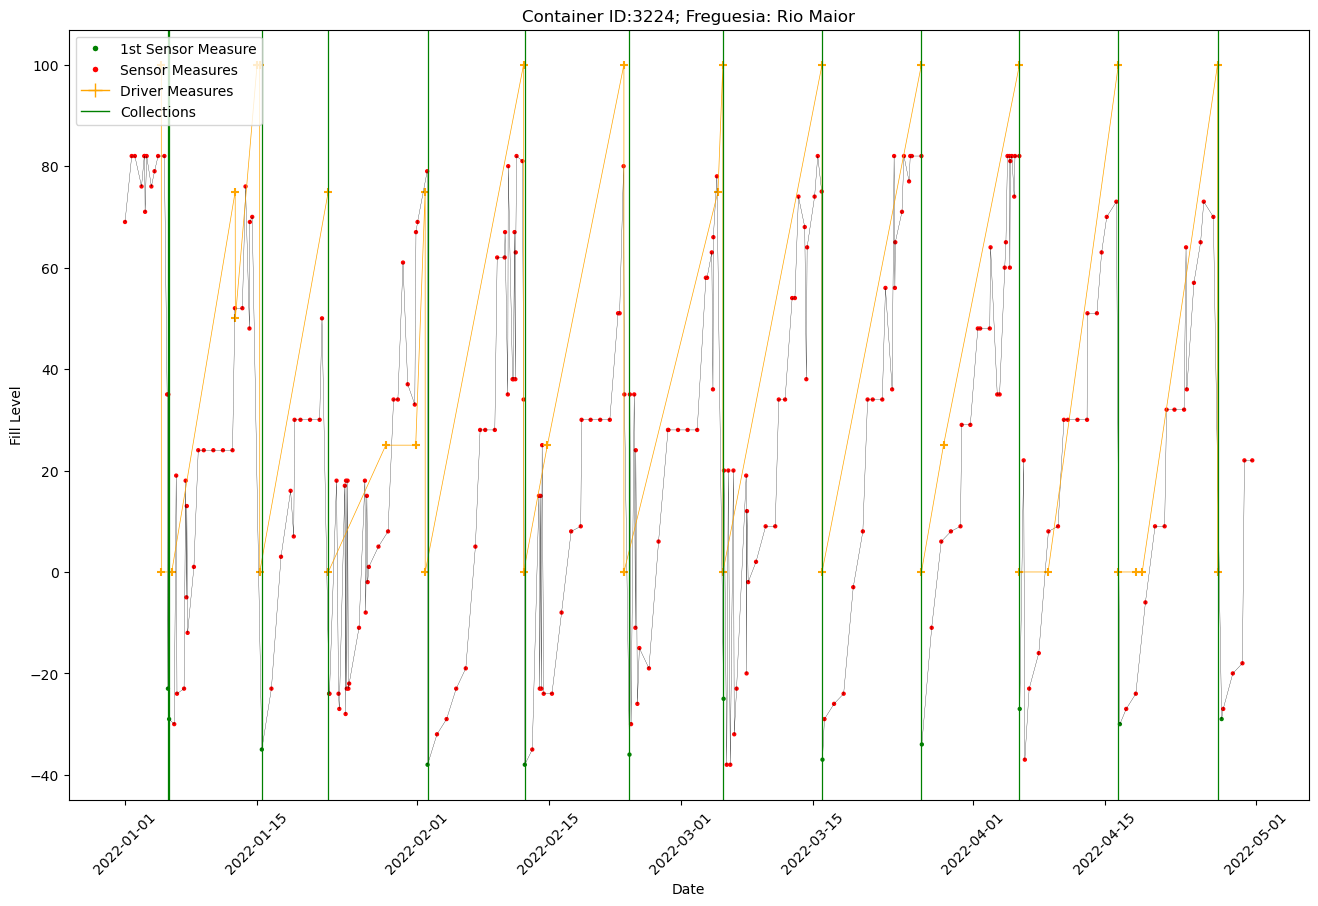

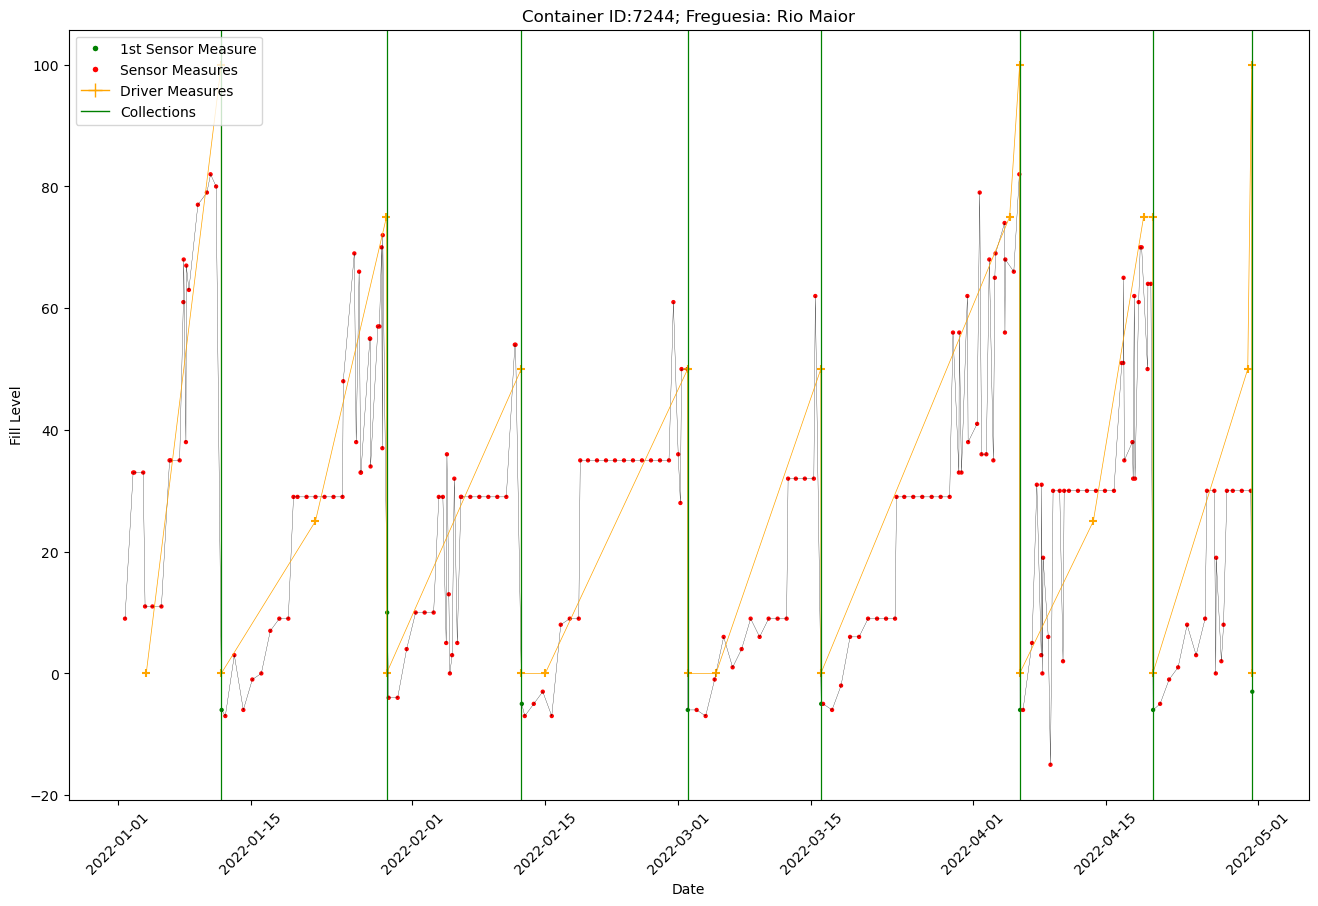

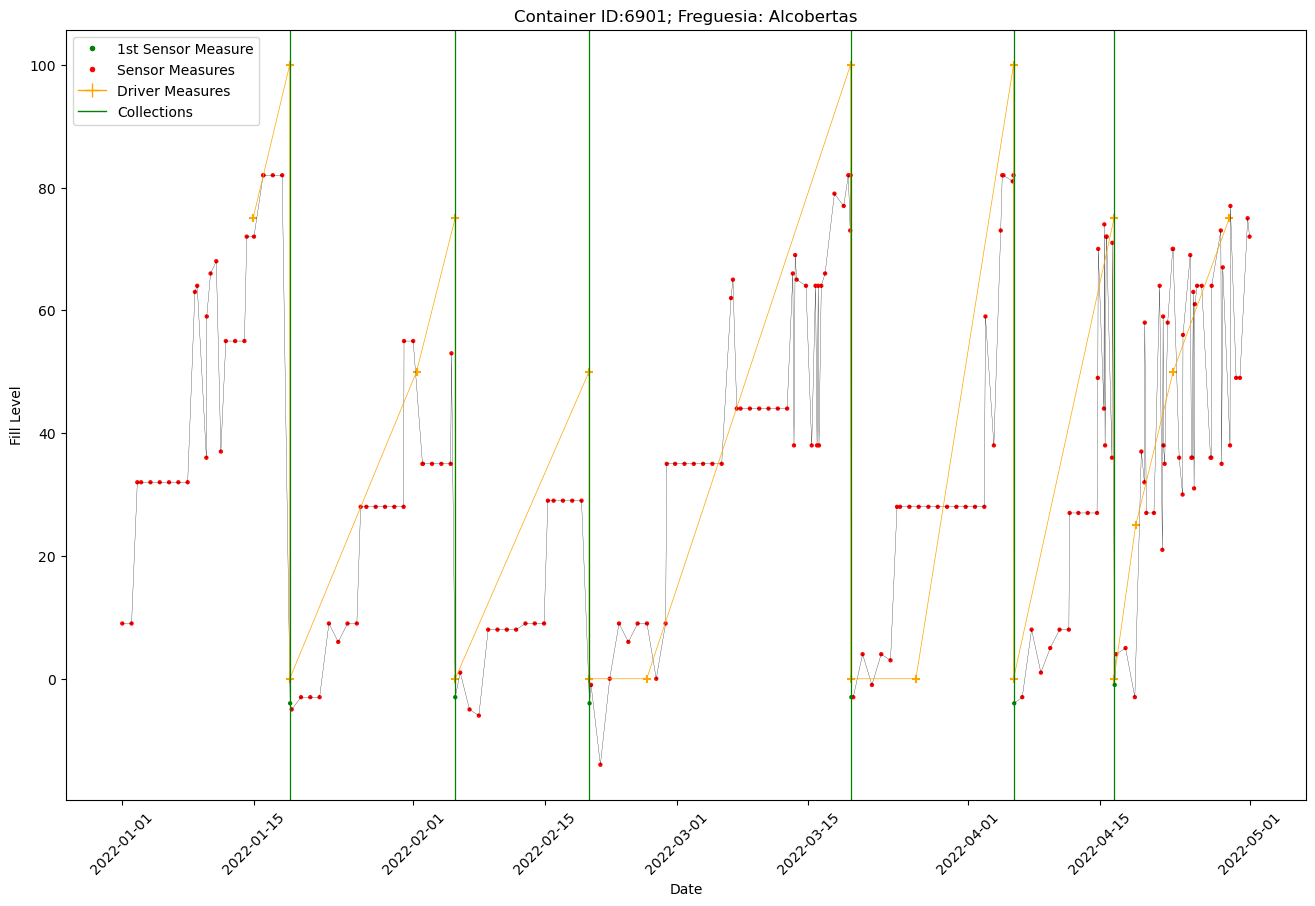

In [25]:
import matplotlib.pyplot as plt


def modified_plot_fill(sensor_container, start_date, end_date, driver_container, fig_size=(16, 10)):
    self = sensor_container

    start_date = pd.to_datetime(start_date, format="%d-%m-%Y", errors="raise")
    end_date = pd.to_datetime(end_date, format="%d-%m-%Y", errors="raise")

    filtered_df = self.df[start_date:end_date]
    filtered_df2 = self.recs[start_date:end_date]
    filtered_drivers = driver_container.df[start_date:end_date]

    colors = filtered_df["Rec"].map({1: "green", 0: "red"})

    plt.figure(figsize=fig_size)

    plt.plot(filtered_df.index, filtered_df["Fill"], linestyle="-", color="black", linewidth=0.2)
    plt.scatter(filtered_df.index, filtered_df["Fill"], marker="o", color=colors, s=4.5)
    plt.scatter(filtered_drivers.index, filtered_drivers["Fill"], marker="+", color="orange", s=30)
    plt.plot(filtered_drivers.index, filtered_drivers["Fill"], linestyle="-", color="orange", linewidth=0.5)

    for c in filtered_df2.index:
        plt.axvline(x=c, color="green", linewidth=0.9)

    plt.xlabel("Date")
    plt.ylabel("Fill Level")

    plt.title("Container ID:" + str(int(self.info["ID"].item())) + "; Freguesia: " + str(self.info["Freguesia"].item()))
    plt.xticks(rotation=45)

    green_marker = plt.Line2D(
        [0], [0], marker="o", color="w", label="1st Sensor Measure", markerfacecolor="green", markersize=5, linewidth=0
    )
    red_marker = plt.Line2D(
        [0], [0], marker="o", color="w", label="Sensor Measures", markerfacecolor="red", markersize=5, linewidth=0
    )
    purple_marker = plt.Line2D(
        [0],
        [0],
        marker="+",
        color="orange",
        label="Driver Measures",
        markerfacecolor="orange",
        markersize=10,
        linewidth=1,
    )
    green_line = plt.Line2D([0], [0], linewidth=1, color="green", label="Collections")

    # Updating the legend with the green line
    plt.legend(handles=[green_marker, red_marker, purple_marker, green_line], loc="upper left")
    plt.show()


for id in warn_ids:
    modified_plot_fill(
        start_date=start_date,
        end_date=end_date,
        sensor_container=container_dict[id],
        driver_container=container_drivers[id],
    )

Now we get sensor and driver statistics

In [26]:
import extract as e

PATH = "/home/andre/SmartData/"
FILEs = "Enchimentos_de_Sensores[RioMaior].csv"
FILEd = "Enchimentos_com_Recolhas[RioMaior].csv"

fill_df, _ = e.import_same_file(FILEs, collect_id_header="idrecolha", sep=";", path=PATH, print_first_line=False)

_, rec_df = e.import_same_file(FILEd, collect_id_header="idrecolha", sep=";", path=PATH, print_first_line=False)

fill, collect, info = e.pre_process_data(
    df_fill=fill_df,
    df_collection=rec_df,
    id_header_fill="idcontentor",
    date_header_fill="Data da leitura",
    date_format_fill="%Y-%m-%d %H:%M:%S.%f",
    fill_header_fill="Enchimento",
    id_header_collect="idcontentor",
    date_header_collect="Data da leitura",
    date_format_collect="%Y-%m-%d %H:%M:%S.%f",
)

dict_bins, ids = e.container_global_sorted_wrapper(fill, collect, info)

fill = fill[fill["ID"] != 10077]

num_bins = len(dict_bins.keys())

list(dict_bins.items())

trash_type = [c.info["description"].item() for id, c in dict_bins.items()]

vals = list(set(trash_type))  # keep just unqieu values
# c1_idx     = list(filter(lambda i: trash_type[i] == vals[0], range(len(trash_type))))
# c2_idx     = list(filter(lambda i: trash_type[i] == vals[1], range(len(trash_type))))


print(vals[0])

fill_2021 = fill[
    (fill["Date"].dt.year == 2021) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[0])
]
fill_2022 = fill[
    (fill["Date"].dt.year == 2022) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[0])
]
fill_2023 = fill[
    (fill["Date"].dt.year == 2023) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[0])
]
fill_2024 = fill[
    (fill["Date"].dt.year == 2024) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[0])
]

print(len(fill_2021["ID"].unique()))
print(len(fill_2022["ID"].unique()))
print(len(fill_2023["ID"].unique()))
print(len(fill_2024["ID"].unique()))

print(len(fill_2021) / (52 * fill_2021["ID"].nunique()))
print(len(fill_2022) / (52 * fill_2022["ID"].nunique()))
print(len(fill_2023) / (52 * fill_2023["ID"].nunique()))
print(len(fill_2024) / (18 * fill_2024["ID"].nunique()))

print(vals[1])

fill_2021 = fill[
    (fill["Date"].dt.year == 2021) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]
fill_2022 = fill[
    (fill["Date"].dt.year == 2022) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]
fill_2023 = fill[
    (fill["Date"].dt.year == 2023) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]
fill_2024 = fill[
    (fill["Date"].dt.year == 2024) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]

print(len(fill_2021["ID"].unique()))
print(len(fill_2022["ID"].unique()))
print(len(fill_2023["ID"].unique()))
print(len(fill_2024["ID"].unique()))

print(len(fill_2021) / (52 * fill_2021["ID"].nunique()))
print(len(fill_2022) / (52 * fill_2022["ID"].nunique()))
print(len(fill_2023) / (52 * fill_2023["ID"].nunique()))
print(len(fill_2024) / (18 * fill_2024["ID"].nunique()))

Container 10077 Collections and Measures do not intersect
Mistura de embalagens
133
136
167
161
11.193175245806824
10.878393665158372
20.651543067710733
34.32953761214631
Embalagens de papel e cartão
127
137
164
164
11.636583888552392
10.954941044357103
18.66733114446529
31.459349593495936


In [ ]:
dict_bins[11787].info["description"].item()

KeyError: 11787

In [27]:
fill_df, rec_df = e.import_same_file(FILEd, collect_id_header="idrecolha", sep=";", path=PATH, print_first_line=False)

fill, collect, info = e.pre_process_data(
    df_fill=fill_df,
    df_collection=rec_df,
    id_header_fill="idcontentor",
    date_header_fill="Data da leitura",
    date_format_fill="%Y-%m-%d %H:%M:%S.%f",
    fill_header_fill="Enchimento",
    id_header_collect="idcontentor",
    date_header_collect="Data da leitura",
    date_format_collect="%Y-%m-%d %H:%M:%S.%f",
)

dict_bins, ids = e.container_global_sorted_wrapper(fill, collect, info)

num_bins = len(dict_bins.keys())

list(dict_bins.items())

trash_type = [c.info["description"].item() for id, c in dict_bins.items()]

vals = list(set(trash_type))  # keep just unqieu values
# c1_idx     = list(filter(lambda i: trash_type[i] == vals[0], range(len(trash_type))))
# c2_idx     = list(filter(lambda i: trash_type[i] == vals[1], range(len(trash_type))))


print(vals[1])

fill_2021 = fill[
    (fill["Date"].dt.year == 2021) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]
fill_2022 = fill[
    (fill["Date"].dt.year == 2022) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]
fill_2023 = fill[
    (fill["Date"].dt.year == 2023) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]
fill_2024 = fill[
    (fill["Date"].dt.year == 2024) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[1])
]

print(len(fill_2021["ID"].unique()))
print(len(fill_2022["ID"].unique()))
print(len(fill_2023["ID"].unique()))
print(len(fill_2024["ID"].unique()))

print(len(fill_2021) / (52 * fill_2021["ID"].nunique()))
print(len(fill_2022) / (52 * fill_2022["ID"].nunique()))
print(len(fill_2023) / (52 * fill_2023["ID"].nunique()))
print(len(fill_2024) / (18 * fill_2024["ID"].nunique()))

print(vals[2])

fill_2021 = fill[
    (fill["Date"].dt.year == 2021) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[2])
]
fill_2022 = fill[
    (fill["Date"].dt.year == 2022) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[2])
]
fill_2023 = fill[
    (fill["Date"].dt.year == 2023) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[2])
]
fill_2024 = fill[
    (fill["Date"].dt.year == 2024) & (fill["ID"].apply(lambda x: dict_bins[x].info["description"].item()) == vals[2])
]

print(len(fill_2021["ID"].unique()))
print(len(fill_2022["ID"].unique()))
print(len(fill_2023["ID"].unique()))
print(len(fill_2024["ID"].unique()))

print(len(fill_2021) / (52 * fill_2021["ID"].nunique()))
print(len(fill_2022) / (52 * fill_2022["ID"].nunique()))
print(len(fill_2023) / (52 * fill_2023["ID"].nunique()))
print(len(fill_2024) / (18 * fill_2024["ID"].nunique()))

Embalagens de Vidro
219
230
237
173
1.3303477344573236
1.2096989966555185
1.105322947095099
0.6991008349389852
Embalagens de papel e cartão
229
243
255
253
1.801477997984548
1.6801202912314024
1.5938914027149322
1.1756697408871322


In [35]:
from datetime import datetime

print(fill_2024["Date"].max())

# Define the start and end dates
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 4, 30)

# Calculate the difference in days
delta_days = (end_date - start_date).days

# Convert days to weeks
weeks_passed = delta_days / 7

print(weeks_passed)

2024-04-29 21:29:06.059000
17.142857142857142


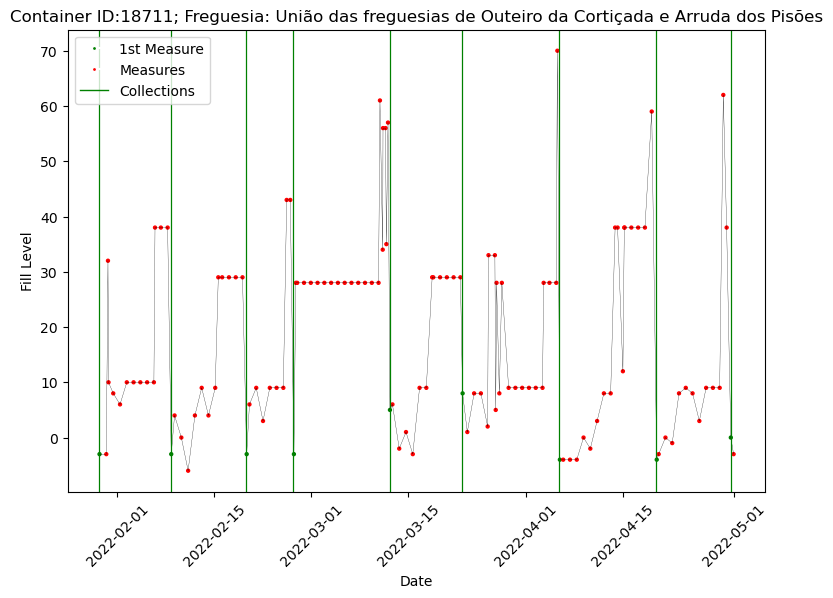

In [38]:
import numpy as np


def plot_diff_histogram(sensor_container, sensor_container2, fig_size=(9, 6)):
    self = sensor_container

    filtered_df = self.df["Fill"].diff()
    filtered_df[self.df["Rec"] == 1] = np.NaN
    filtered_df[filtered_df == 0] = np.NaN

    filtered_df2 = sensor_container2.df["Fill"].diff()
    filtered_df2[sensor_container2.df["Rec"] == 1] = np.NaN
    filtered_df2[filtered_df2 == 0] = np.NaN

    plt.figure(figsize=fig_size)

    plt.hist(filtered_df, bins=80, alpha=1, label="11787")
    plt.hist(filtered_df2, bins=80, alpha=0.5, label="209")

    plt.ylabel("Frequency")
    plt.xlabel("Difference")

    # plt.title('Container ID:' + str(int(self.info['ID'].item())) + '; Freguesia: ' + str(self.info['Freguesia'].item()))

    plt.legend()

    plt.show()


container_dict[18711].plot_fill(start_date, end_date)

# plot_diff_histogram(container_dict[18711], container_dict[209])

Seasonaliy

In [7]:
PATH = "/home/andre/SmartSensro2024/"

# ids = sl.load_id_containers(path = PATH, name = "Rate_Ids")
ids = list(container_dict.keys())

rate_dict = {}

for id in ids:
    rate_dict[id] = sl.load_rate_series(id=id, rate_type="crude", path=PATH)


rate_dict0 = {key: rate_dict[key] for key in c1_keys}
rate_dict1 = {key: rate_dict[key] for key in c2_keys}

In [113]:
print(rate_dict[192]["data"]["Rate"].to_numpy())

[ 0.00000000e+00  1.58888889e+00  9.41111111e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.49673203e-02  1.00179282e+01
  8.06703911e+00  0.00000000e+00  0.00000000e+00 -8.91456583e-01
  8.91456583e-01  4.87840671e+00  5.07281280e+00 -5.50345832e+00
 -2.19029851e+00  1.23111648e+01  8.43137255e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.41787709e+01 -3.37480627e-01
 -6.84129032e+00  7.79270073e+00  9.20729927e+00  5.92920354e+00
  4.07079646e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.21705426e+00
  1.55114638e+01  1.66853475e+01  1.85861345e+01  1.00000000e+01
  0.00000000e+00 -8.62190813e+00  1.56219081e+01 -4.16137806e+00
 -4.83862194e+00  3.82320000e+00  7.49424919e+00  3.24137434e+00
 -6.97058824e+00  6.46922792e+00  5.94253679e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.55919395e+00
  5.44080605e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.39090909e+00  6.60909

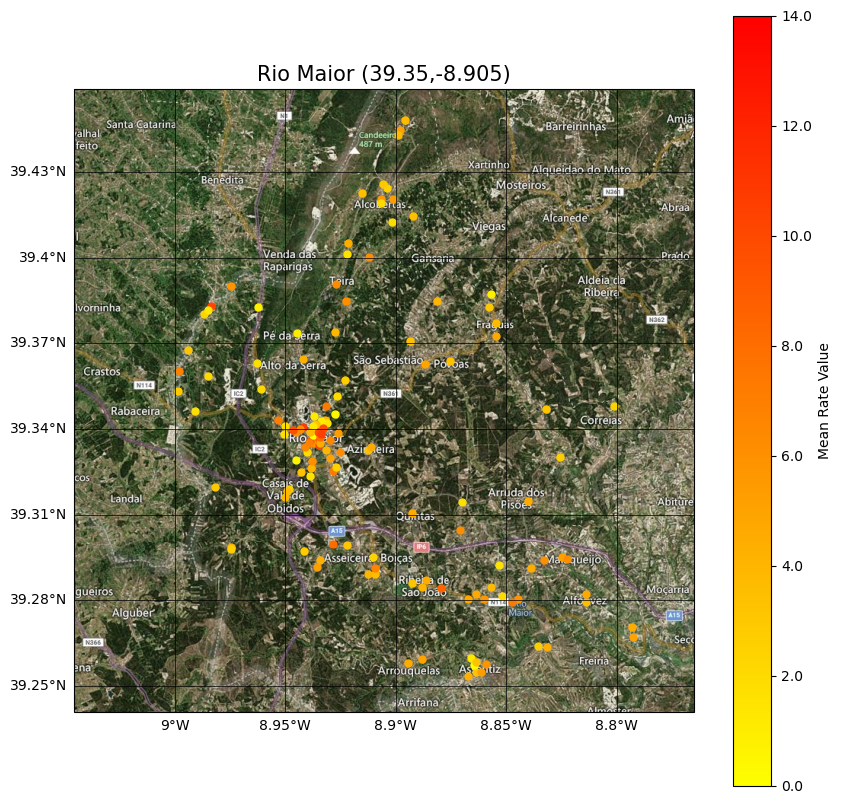

In [17]:
import io
import os
from urllib.request import Request, urlopen

import cartopy
import cartopy.crs as ccrs
import cartopy.geodesic as cgeo
import cartopy.io.img_tiles as cimgt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import shapely
from matplotlib import patches
from matplotlib.colors import ListedColormap
from PIL import Image

projpath = "."

##########################################################################


def main():
    sitename = "Rio Maior"
    lat = 39.35
    lon = -8.905

    # style can be 'map' or 'satellite'

    for style in ["satellite"]:
        osm_image(lon, lat, sitename=sitename, style=style, radius=11000, npoints=500)


##########################################################################


def osm_image(lon, lat, radius, sitename="Columbo", style="map", npoints=500):
    """This function makes OpenStreetMap satellite or map image with circle and random points.
    Change np.random.seed() number to produce different (reproducable) random patterns of points.
    Also review 'scale' variable"""

    if style == "map":
        ## MAP STYLE
        cimgt.OSM.get_image = image_spoof  # reformat web request for street map spoofing
        img = cimgt.OSM()  # spoofed, downloaded street map
    elif style == "satellite":
        # SATELLITE STYLE
        cimgt.QuadtreeTiles.get_image = image_spoof  # reformat web request for street map spoofing
        img = cimgt.QuadtreeTiles()  # spoofed, downloaded street map
    else:
        print("no valid style")

    stroke = [pe.Stroke(linewidth=1, foreground="w"), pe.Normal()]

    ############################################################################

    plt.close("all")
    fig = plt.figure(figsize=(10, 10))  # open matplotlib figure
    ax = plt.axes(projection=img.crs)  # project using coordinate reference system (CRS) of street map
    data_crs = ccrs.PlateCarree()

    ax.set_title(f"{sitename} ({lat},{lon})", fontsize=15)

    # auto-calculate scale
    scale = int(120 / np.log(radius))
    scale = (scale < 20) and scale or 19

    # or change scale manually
    # NOTE: scale specifications should be selected based on radius
    # but be careful not have both large scale (>16) and large radius (>1000),
    #  it is forbidden under [OSM policies](https://operations.osmfoundation.org/policies/tiles/)
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    extent = calc_extent(lon, lat, radius * 1.1)
    ax.set_extent(extent)  # set extents
    ax.add_image(img, int(scale))  # add OSM with zoom specification

    points = generate_datapoints(container_dict1, rate_dict1)

    means = [p["M"] for p in points]
    # maxfill = max(means)
    maxfill = 14
    # minfill = min(means)
    minfill = 0

    gradient = create_gradient_palette()

    for p in points:
        ax.plot(
            p["lon"],
            p["lat"],
            color=get_color_for_fill(gradient, p["M"] if p["M"] > 0 else 0, minfill, maxfill),
            marker="o",
            ms=5,
            transform=data_crs,
        )

    gl = ax.gridlines(draw_labels=True, crs=data_crs, color="k", lw=0.5)

    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

    sm = plt.cm.ScalarMappable(cmap=ListedColormap(gradient), norm=mcolors.Normalize(vmin=minfill, vmax=maxfill))
    sm.set_array([])

    # Add the color bar to the plot with your custom colormap
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
    cbar.set_label("Mean Rate Value")
    cbar.set_ticks(np.linspace(0, 14, 8))
    cbar.set_ticklabels(np.linspace(0, 14, 8))

    plt.show()


def calc_extent(lon, lat, dist):
    """This function calculates extent of map
    Inputs:
        lat,lon: location in degrees
        dist: dist to edge from centre
    """

    dist_cnr = np.sqrt(2 * dist**2)
    top_left = cgeo.Geodesic().direct(points=(lon, lat), azimuths=-45, distances=dist_cnr)[:, 0:2][0]
    bot_right = cgeo.Geodesic().direct(points=(lon, lat), azimuths=135, distances=dist_cnr)[:, 0:2][0]

    extent = [top_left[0], bot_right[0], bot_right[1], top_left[1]]

    return extent


def image_spoof(self, tile):
    """this function reformats web requests from OSM for cartopy
    Heavily based on code by Joshua Hrisko at:
        https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy"""

    url = self._image_url(tile)  # get the url of the street map API
    req = Request(url)  # start request
    req.add_header("User-agent", "Anaconda 3")  # add user agent to request
    fh = urlopen(req)
    im_data = io.BytesIO(fh.read())  # get image
    fh.close()  # close url
    img = Image.open(im_data)  # open image with PIL
    img = img.convert(self.desired_tile_form)  # set image format
    return img, self.tileextent(tile), "lower"  # reformat for cartopy


if __name__ == "__main__":
    main()

In [10]:
def create_gradient_palette(num_colors=256):
    """Generate a gradient color palette between start_color and end_color."""

    start_color = (255, 255, 0)  # yellow
    end_color = (255, 0, 0)  # red
    gradient = [
        (
            int(start_color[0] + (end_color[0] - start_color[0]) * i / (num_colors - 1)) / num_colors,
            int(start_color[1] + (end_color[1] - start_color[1]) * i / (num_colors - 1)) / num_colors,
            int(start_color[2] + (end_color[2] - start_color[2]) * i / (num_colors - 1)) / num_colors,
        )
        for i in range(num_colors)
    ]
    return gradient


def get_color_for_fill(gradient, fill_value, min_fill, max_fill):
    """Map the fill value to a color on the gradient palette."""
    normalized_fill = int((fill_value - min_fill) / (max_fill - min_fill) * (len(gradient) - 1))
    return gradient[normalized_fill]


def generate_datapoints(container_dict, rate_dict):
    res = []

    for id, container in rate_dict.items():
        d = {}
        d["M"] = np.mean(container["data"]["Rate"].to_numpy())
        d["lat"] = container_dict[id].info["Latitude"]
        d["lon"] = container_dict[id].info["Longitude"]

        res.append(d)

    return res

#SESONALILTY PLOT

In [ ]:
import os

os.chdir("/home/andre/SmartBinAnalysis/Deliverables")

All loaded


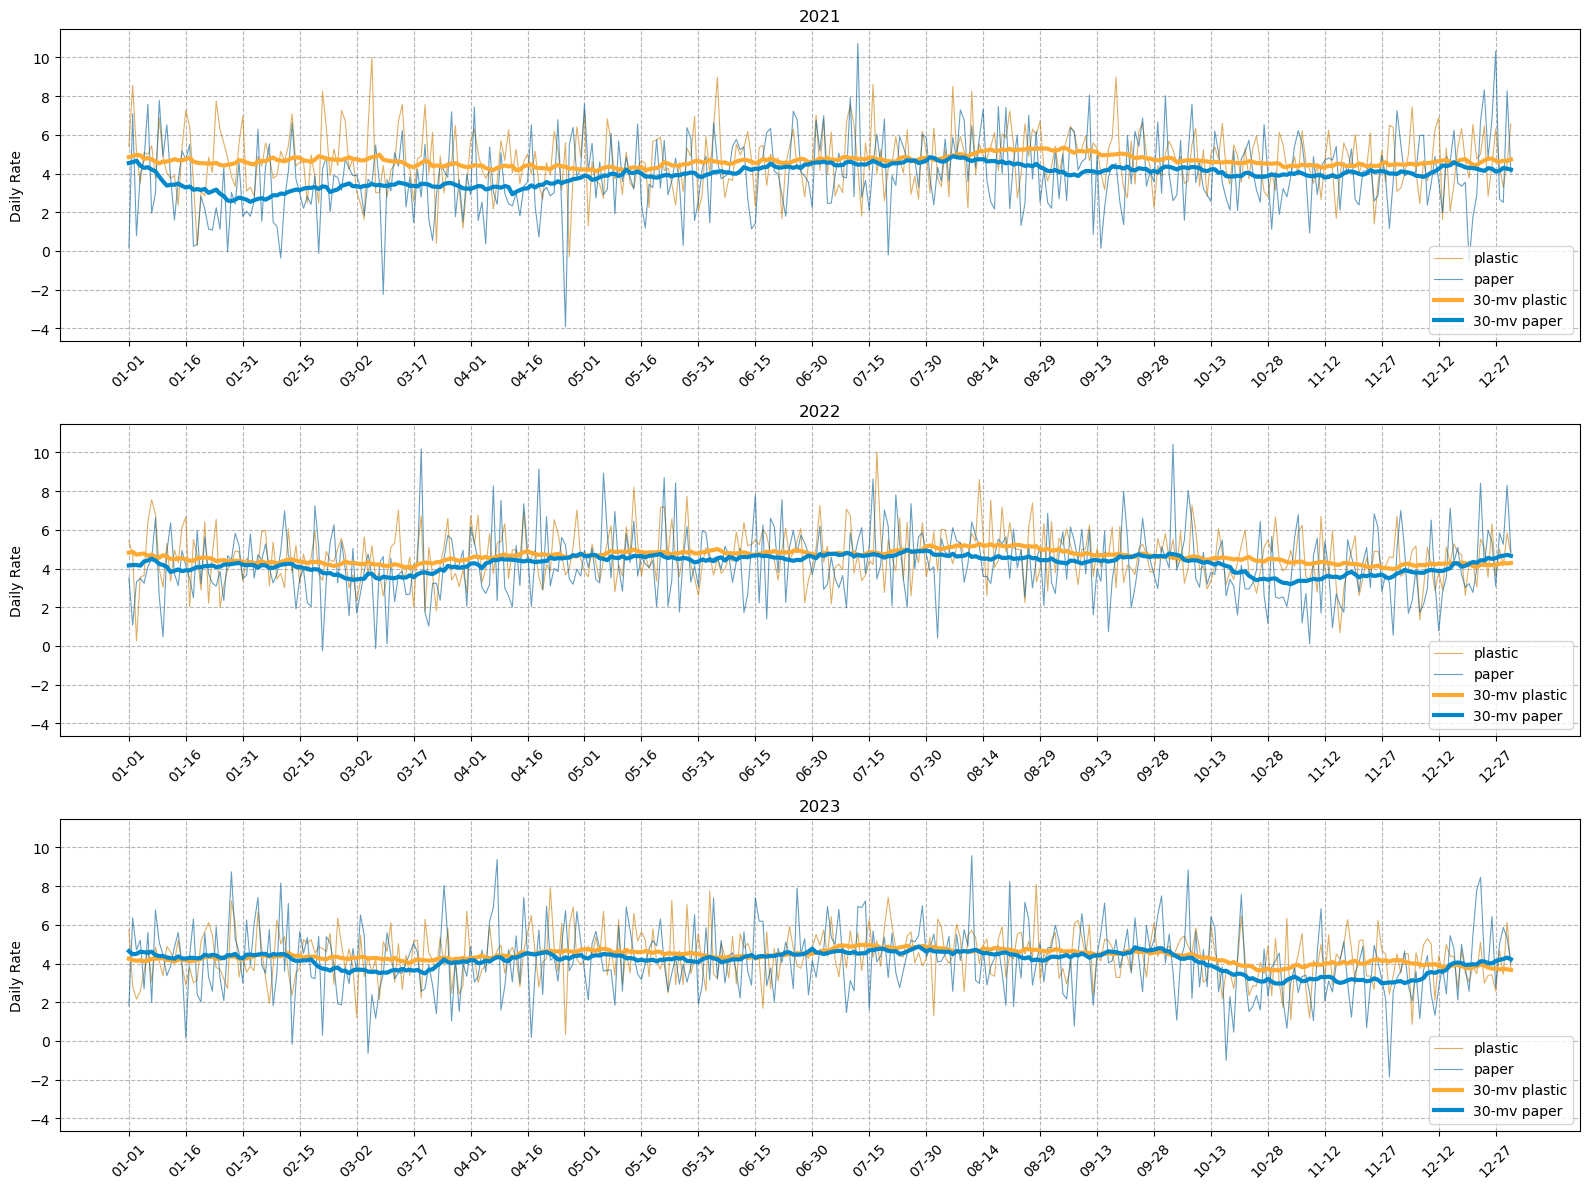

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import save_load as sl
from simulation import GridBase

PATH = "home/andre/SmartSensro2024"

ids = sl.load_id_containers(path=PATH, name="Rate_Ids")

grid = GridBase(ids=ids, data_dir=PATH, rate_type="crude", info_ver="_Corrected_with_metrics")

num_bins = grid.get_num_bins()

trash_type = [grid.get_info(i)["description"].item() for i in range(num_bins)]
vals = list(set(trash_type))  # keep just unqieu values
c1_idx = list(filter(lambda i: trash_type[i] == vals[0], range(len(trash_type))))
c2_idx = list(filter(lambda i: trash_type[i] == vals[1], range(len(trash_type))))


mean_c1 = grid.data.iloc[:, c1_idx].mean(axis=1)
mean_c2 = grid.data.iloc[:, c2_idx].mean(axis=1)

# Assume mean_c1 and mean_c2 are already defined pandas Series with a datetime index

# Compute 30-day moving averages
ma_c1 = mean_c1.rolling(window=30, center=True).mean()
ma_c2 = mean_c2.rolling(window=30, center=True).mean()

# Create figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)

# Years to plot
years = [2021, 2022, 2023]

for ax, year in zip(axes, years):
    # Filter data for the year
    data_c1 = mean_c1[mean_c1.index.year == year]
    data_c2 = mean_c2[mean_c2.index.year == year]
    ma_c1_year = ma_c1[ma_c1.index.year == year]
    ma_c2_year = ma_c2[ma_c2.index.year == year]

    # Plot series and moving averages
    ax.plot(data_c1.index.strftime("%m-%d"), data_c1, label="plastic", color="#CC7A00", alpha=0.6, linewidth=0.8)
    ax.plot(data_c2.index.strftime("%m-%d"), data_c2, label="paper", color="#005F99", alpha=0.6, linewidth=0.8)
    ax.plot(ma_c1_year.index.strftime("%m-%d"), ma_c1_year, label="30-mv plastic", color="#FFAA33", linewidth=3)
    ax.plot(ma_c2_year.index.strftime("%m-%d"), ma_c2_year, label="30-mv paper", color="#0088CC", linewidth=3)

    # Adjust x-ticks
    ax.set_xticks(data_c1.index.strftime("%m-%d")[::15])  # Show one tick every 10 days
    ax.tick_params(axis="x", rotation=45)

    # Add grid
    ax.grid(visible=True, linestyle="--", alpha=0.9)

    ax.set_ylabel("Daily Rate")

    # Set title
    ax.set_title(f"{year}")
    legend = ax.legend()
    # legend.get_frame().set_facecolor('#f2f2f2')
    # ax.set_facecolor('#f2f2f2')
    legend.set_loc("lower right")


# fig.patch.set_facecolor('#f2f2f2')

# Adjust layout
plt.tight_layout()
plt.show()